# Introduction
safe2choose is a social enterprise that is a part of an international movement for reproductive health and access to safe abortion. safe2choose is an online counseling and informational platform that supports women who want an abortion with pills or a surgical abortion, and when needed, refers them to trusted, trained and pro-choice healthcare providers. In this notebook we are going to analyze two datasets from safe2choose organization and also make some predictive analysis.

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=FutureWarning)


In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Reading Data using pandas

In [3]:
counselling_data = pd.read_excel("../data/Counselling_referral_data_Sep_Dec_2022_safe2choose.xlsx")
counselling_data.head()

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,Customer interactions,First response status,Tags,Countries (NEW),Region,Agent 2,Agent 3,Language,City,Age,Gestational weeks at first contact,+ days,Main reason for contact,Subreason 1,Subreason 2,2nd reason for contact,2nd Subreason 1,3rd reason for contact,3rd Subreason 1,In possession of pills,Kind of pills,Amount of pills,Abortion method counselled on,MA,MVA/EVA,D&E,Induction,PAC,Referral,Ability to pay for referral services/products,Reason for not referring,Reason for referral,ref-Subreason 1,Referred to on-the-ground org,Referred to direct provider
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,00:00:00,1,2,Within SLA,NaN,NaN,NaN,NaN,NaN,Spanish,NaN,NaN,NaN,NaN,Suspected Pregnancy/Pregnancy confirmation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,No,NaN,Suspected Pregnancy,NaN,NaN,False,False
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,00:00:00,0,1,NaN,Away conversation,NaN,NaN,NaN,NaN,Spanish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
2,92856,Evaluation sent,Email,No Agent,Spanish,2022-09-01 00:10:48,September,2022-09-27 18:12:41,00:00:00,0,1,NaN,NaN,NaN,NaN,NaN,NaN,Spanish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
3,101202,Waiting on KQ - reminder,Chat,Lucy P,Spanish,2022-09-23 18:20:24,September,2022-09-30 20:23:28,00:00:00,1,1,Within SLA,NaN,Argentina,NaN,NaN,NaN,Spanish,NaN,NaN,NaN,NaN,Access to abortion services/Help General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,No,NaN,Dropped,NaN,NaN,False,False
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,00:00:00,0,1,NaN,Away conversation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False


In [4]:
acquisition_data = pd.read_excel("../data/Google_Analytics_data_Sep_Dec_22_safe2choose.xlsx", sheet_name="Acquisition")
acquisition_data.head()

,Default Channel Grouping,Users,New Users,Sessions,Bounce Rate,Pages/Session,Avg. Session Duration
0,Organic Search,908831,835236,1168784,0.138337,2.787992,95.430919
1,Paid Search,208793,195714,306754,0.774842,1.362307,23.712111
2,Direct,196238,194134,230303,0.169594,2.999462,101.461001
3,Referral,12982,11125,16405,0.128436,4.324169,164.829930
4,Social,7645,6875,8915,0.131015,5.106786,151.808301


In [5]:
age_data = pd.read_excel("../data/Google_Analytics_data_Sep_Dec_22_safe2choose.xlsx", sheet_name="Age")
age_data.head()

,Age,Users
0,18-24,148670
1,25-34,133562
2,35-44,67560
3,45-54,41398
4,55-64,25973


In [6]:
gender_data = pd.read_excel("../data/Google_Analytics_data_Sep_Dec_22_safe2choose.xlsx", sheet_name="Gender")
gender_data.head()

,Gender,Users
0,female,271582
1,male,237350
2,NaN,508932


In [7]:
page_visits = pd.read_excel("../data/Google_Analytics_data_Sep_Dec_22_safe2choose.xlsx", sheet_name="Page visits")
page_visits.head()

,Page,Page Views,Unique Page Views,Avg. Time on Page,Entrances,Bounce Rate,% Exit
0,/es/safe-abortion/abortion-pills/abortion-with...,213211,104666,68.005218,93371,0.134155,0.439110
1,/,206788,112562,40.616076,85384,0.218065,0.284741
2,/hi/safe-abortion/abortion-pills/types-abortio...,194308,92092,55.053400,86218,0.107318,0.442658
3,/abortion-pill-information,158841,134952,66.963177,132388,0.810458,0.821167
4,/safe-abortion/abortion-pills/using-mifepristo...,141541,70847,78.848416,59482,0.133565,0.424153


In [8]:
geography_data = pd.read_excel("../data/Google_Analytics_data_Sep_Dec_22_safe2choose.xlsx", sheet_name="Geography")
geography_data.head()

,Country,Users,New Users,Sessions,Bounce Rate,Pages/Session,Avg. Session Duration
0,India,172126,173438,213566,0.119153,2.472627,73.011327
1,Brazil,106594,105322,142237,0.120834,3.263483,114.385638
2,Philippines,99889,97929,128124,0.136766,2.729372,114.057764
3,Mexico,90855,89773,124194,0.257484,2.698222,76.659275
4,Liberia,60141,59960,60819,0.277791,2.437741,44.913547


In [9]:
users_data = pd.read_excel("../data/Google_Analytics_data_Sep_Dec_22_safe2choose.xlsx", sheet_name="Users - Sep-Dec 22")
users_data.head()

,Day Index,Users
0,2022-09-01,8232
1,2022-09-02,8179
2,2022-09-03,7755
3,2022-09-04,7231
4,2022-09-05,8112


## Data Cleaning and Examination

We are going to examine the datasets. we are going to check for any missing observations or columns where the data do not seem valid. We are starting with the counselling dataset

In [10]:
counselling_data.shape

(2336, 45)

The counselling table has 2336 rows and 45 columns.

In [11]:
counselling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ticket ID                                      2336 non-null   int64  
 1   Status                                         2336 non-null   object 
 2   Source                                         2336 non-null   object 
 3   Agent                                          2336 non-null   object 
 4   Group                                          2336 non-null   object 
 5   Created time                                   2336 non-null   object 
 6   Month                                          2336 non-null   object 
 7   Last update time                               2336 non-null   object 
 8   Resolution time (in hrs)                       2336 non-null   object 
 9   Agent interactions                             2336 

In [12]:
counselling_data.isnull().sum()

Ticket ID                                           0
Status                                              0
Source                                              0
Agent                                               0
Group                                               0
Created time                                        0
Month                                               0
Last update time                                    0
Resolution time (in hrs)                            0
Agent interactions                                  0
Customer interactions                               0
First response status                            1749
Tags                                             1045
Countries (NEW)                                  1763
Region                                           2336
Agent 2                                          2248
Agent 3                                          2325
Language                                          578
City                        

In [13]:
counselling_data["Created time"] = pd.to_datetime(counselling_data["Created time"])
counselling_data["Created weekday"] = counselling_data["Created time"].dt.strftime("%a")

We are going to drop the region column because it is completely empty. For the other columns with missing values, we are going keep them on for now until we do our exploratory data analysis so we are better informed on how our data looks like, the best way to deal with them and the relationship between the column. During data visualizations, missing values dont just get plotted so this is fine.

In [14]:
counselling_data.drop(columns=["Region","Created time","Last update time","ref-Subreason 1","+ days", "Subreason 1",
"Subreason 2","2nd reason for contact","2nd Subreason 1","3rd reason for contact","3rd Subreason 1", "Resolution time (in hrs)"], inplace=True)

In [15]:
counselling_data.describe(include="all")

,Ticket ID,Status,Source,Agent,Group,Month,Agent interactions,Customer interactions,First response status,Tags,Countries (NEW),Agent 2,Agent 3,Language,City,Age,Gestational weeks at first contact,Main reason for contact,In possession of pills,Kind of pills,Amount of pills,Abortion method counselled on,MA,MVA/EVA,D&E,Induction,PAC,Referral,Ability to pay for referral services/products,Reason for not referring,Reason for referral,Referred to on-the-ground org,Referred to direct provider,Created weekday
count,2336.000000,2336,2336,2336,2336,2336,2336.000000,2336.000000,587,1291,573,88,11,1758,364,34.000000,384,693,367,90,63,412,2336,2336,2336,2336,2336,688,3,320,397,2336,2336,2336
unique,NaN,10,2,13,9,4,NaN,NaN,2,4,52,11,7,8,247,NaN,25,18,2,2,7,1,2,2,2,2,2,2,2,8,9,2,2,7
top,NaN,Waiting on KQ,Chat,No Agent,Spanish,December,NaN,NaN,Within SLA,Away conversation,Mexico,Maria Silva,Maria Silva,Spanish,Lima,NaN,5 weeks,Access to abortion services/Help General,No,Miso only,12,Which methods,False,False,False,False,False,Yes,No,Dropped,Access to pills,False,False,Mon
freq,NaN,655,1485,1583,1123,855,NaN,NaN,517,995,149,23,3,1123,16,NaN,81,286,266,67,20,412,1955,2320,2318,2320,2304,399,2,118,225,1990,2315,476
mean,119473.139983,NaN,NaN,NaN,NaN,NaN,0.376284,1.347603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.176471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12828.671442,NaN,NaN,NaN,NaN,NaN,0.855827,0.901996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.313212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,92854.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,104256.750000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,121201.500000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,132412.500000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are lots of missing values in this dataset. Here are some of insights from this dataset.
* Most customers use the chat support line to open tickets
* The most tickets were logged in december. This might be because of the festive season and loved ones are together and this might lead to an increase in demand for Access to abortion services/Help General.
* Maria Silva is the agent that has the highest number of tickets. This could possibly mean she is a top performer or it might be because a large number of tickets were logged in spanish and she can speak spanish
* Mean age in the dataset is around 21. Ps. this can also be inferred from the visualization done for the age data


In [16]:
acquisition_data.shape

(8, 7)

In [17]:
acquisition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Default Channel Grouping  7 non-null      object 
 1   Users                     8 non-null      int64  
 2   New Users                 8 non-null      int64  
 3   Sessions                  8 non-null      int64  
 4   Bounce Rate               8 non-null      float64
 5   Pages/Session             8 non-null      float64
 6   Avg. Session Duration     8 non-null      float64
dtypes: float64(3), int64(3), object(1)
memory usage: 576.0+ bytes


In [18]:
acquisition_data.isnull().sum()

Default Channel Grouping    1
Users                       0
New Users                   0
Sessions                    0
Bounce Rate                 0
Pages/Session               0
Avg. Session Duration       0
dtype: int64

In [19]:
acquisition_data['Default Channel Grouping'] = acquisition_data['Default Channel Grouping'].replace({np.NAN: "Summary"})

In [20]:
acquisition_data.isnull().sum()

Default Channel Grouping    0
Users                       0
New Users                   0
Sessions                    0
Bounce Rate                 0
Pages/Session               0
Avg. Session Duration       0
dtype: int64

In [21]:
acquisition_data.describe(include="all")

,Default Channel Grouping,Users,New Users,Sessions,Bounce Rate,Pages/Session,Avg. Session Duration
count,8,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN
top,Organic Search,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.336232e+05,3.107718e+05,4.327920e+05,0.249672,2.946339,103.489411
std,NaN,5.069151e+05,4.700175e+05,6.559631e+05,0.241529,1.220306,54.584131
min,NaN,1.000000e+00,1.000000e+00,2.000000e+00,0.000000,1.362307,23.712111
25%,NaN,5.734500e+03,5.156750e+03,6.687500e+03,0.130370,2.300000,73.354772
50%,NaN,1.046100e+05,1.026295e+05,1.233540e+05,0.153965,2.688994,98.445960
75%,NaN,3.838025e+05,3.555945e+05,5.222615e+05,0.291362,3.330639,155.063708


In [22]:
age_data.shape

(7, 2)

In [23]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     6 non-null      object
 1   Users   7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [24]:
age_data.isnull().sum()

Age      1
Users    0
dtype: int64

In [25]:
age_data['Age'] = age_data['Age'].replace({np.NAN: "Summary"})

In [26]:
age_data.isnull().sum()

Age      0
Users    0
dtype: int64

In [27]:
age_data.describe(include="all")

,Age,Users
count,7,7.000000
unique,7,NaN
top,18-24,NaN
freq,1,NaN
mean,NaN,123788.285714
std,NaN,145832.087240
min,NaN,16096.000000
25%,NaN,33685.500000
50%,NaN,67560.000000
75%,NaN,141116.000000


In [28]:
gender_data.shape

(3, 2)

In [29]:
gender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  2 non-null      object
 1   Users   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [30]:
gender_data.isnull().sum()

Gender    1
Users     0
dtype: int64

In [31]:
gender_data['Gender'] = gender_data['Gender'].replace({np.NAN: "Summary"})

In [32]:
gender_data.isnull().sum()

Gender    0
Users     0
dtype: int64

In [33]:
gender_data.describe(include="all")

,Gender,Users
count,3,3.000000
unique,3,NaN
top,female,NaN
freq,1,NaN
mean,NaN,339288.000000
std,NaN,147909.676857
min,NaN,237350.000000
25%,NaN,254466.000000
50%,NaN,271582.000000
75%,NaN,390257.000000


In [34]:
page_visits.shape

(11, 7)

In [35]:
page_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Page               10 non-null     object 
 1   Page Views         11 non-null     int64  
 2   Unique Page Views  11 non-null     int64  
 3   Avg. Time on Page  11 non-null     float64
 4   Entrances          11 non-null     int64  
 5   Bounce Rate        11 non-null     float64
 6   % Exit             11 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 744.0+ bytes


In [36]:
page_visits.isnull().sum()

Page                 1
Page Views           0
Unique Page Views    0
Avg. Time on Page    0
Entrances            0
Bounce Rate          0
% Exit               0
dtype: int64

In [37]:
page_visits['Page'] = page_visits['Page'].replace({np.NAN: "Summary"})

In [38]:
page_visits.describe(include="all")

,Page,Page Views,Unique Page Views,Avg. Time on Page,Entrances,Bounce Rate,% Exit
count,11,1.100000e+01,1.100000e+01,11.000000,1.100000e+01,11.000000,11.000000
unique,11,NaN,NaN,NaN,NaN,NaN,NaN
top,/es/safe-abortion/abortion-pills/abortion-with...,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.452445e+05,2.923923e+05,62.147036,2.219967e+05,0.223219,0.456080
std,NaN,1.306779e+06,7.029520e+05,18.615778,5.010946e+05,0.202888,0.131972
min,NaN,1.134280e+05,5.374600e+04,30.289166,4.117700e+04,0.107318,0.284741
25%,NaN,1.202145e+05,5.840900e+04,52.964807,5.180250e+04,0.132750,0.408555
50%,NaN,1.415410e+05,7.084700e+04,61.724554,6.063500e+04,0.135972,0.439110
75%,NaN,2.005480e+05,1.086140e+05,73.426817,8.979450e+04,0.236608,0.464051


In [39]:
geography_data.shape

(11, 7)

In [40]:
geography_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                10 non-null     object 
 1   Users                  11 non-null     int64  
 2   New Users              11 non-null     int64  
 3   Sessions               11 non-null     int64  
 4   Bounce Rate            11 non-null     float64
 5   Pages/Session          11 non-null     float64
 6   Avg. Session Duration  11 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 744.0+ bytes


In [41]:
geography_data.isnull().sum()

Country                  1
Users                    0
New Users                0
Sessions                 0
Bounce Rate              0
Pages/Session            0
Avg. Session Duration    0
dtype: int64

In [42]:
geography_data['Country'] = geography_data['Country'].replace({np.NAN: "Summary"})

In [43]:
geography_data.describe(include="all")

,Country,Users,New Users,Sessions,Bounce Rate,Pages/Session,Avg. Session Duration
count,11,1.100000e+01,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000
unique,11,NaN,NaN,NaN,NaN,NaN,NaN
top,India,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.831308e+05,1.811861e+05,2.487776e+05,0.259244,2.610597,79.461756
std,NaN,3.590281e+05,3.545245e+05,4.941884e+05,0.156885,0.396661,25.723314
min,NaN,3.729300e+04,3.694500e+04,4.918800e+04,0.119153,1.975223,44.913547
25%,NaN,4.622100e+04,4.617400e+04,6.214650e+04,0.137495,2.423819,62.694212
50%,NaN,6.014100e+04,5.996000e+04,1.062290e+05,0.255150,2.589996,73.011327
75%,NaN,1.032415e+05,1.016255e+05,1.351805e+05,0.281316,2.877179,99.265397


In [44]:
users_data.shape

(123, 2)

In [45]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day Index  122 non-null    datetime64[ns]
 1   Users      123 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [46]:
users_data.isnull().sum()

Day Index    1
Users        0
dtype: int64

In [47]:
users_data['Day Index'] = users_data['Day Index'].replace({np.NAN: "Summary"})

In [48]:
users_data.describe(include="all")

,Day Index,Users
count,123,1.230000e+02
unique,123,NaN
top,2022-09-01 00:00:00,NaN
freq,1,NaN
mean,NaN,2.374211e+04
std,NaN,1.305970e+05
min,NaN,7.231000e+03
25%,NaN,1.072750e+04
50%,NaN,1.180300e+04
75%,NaN,1.360450e+04


## Exploratory Data Analysis

we are going to start the exploratory data analysis for the counselling data by looking at the distribution of our dataset

In [49]:
def plot_histogram(dataset):
    for column in dataset.columns:
        plt.figure(figsize=(20, 10))
        sns.displot(dataset[column], bins=35)
        plt.title(f"Histogram of the {column} column", weight='bold', size=19)
        plt.xlabel(column, fontsize=19, weight='bold')
        plt.ylabel('Frequency', fontsize=19, weight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.show()

<Figure size 2000x1000 with 0 Axes>

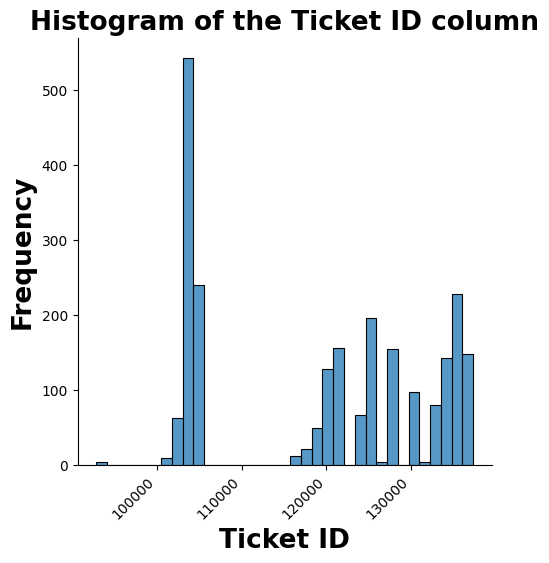

<Figure size 2000x1000 with 0 Axes>

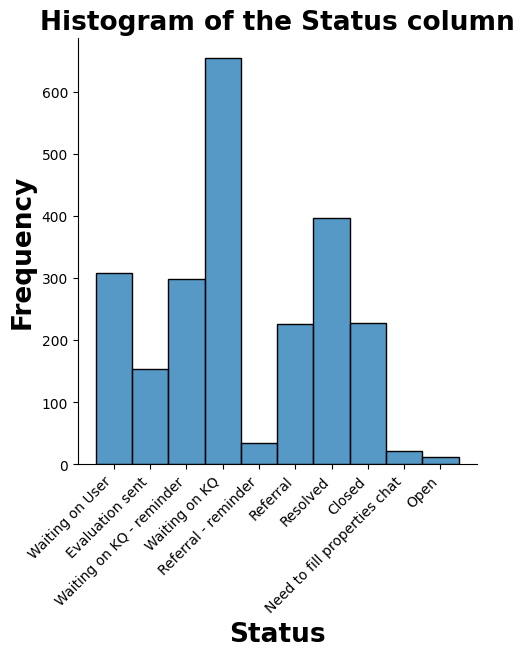

<Figure size 2000x1000 with 0 Axes>

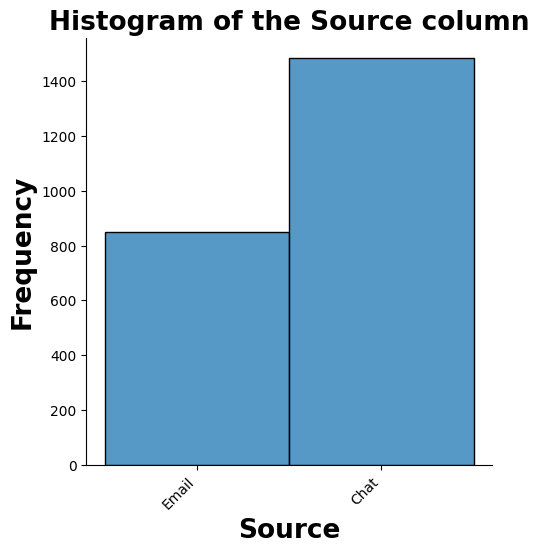

<Figure size 2000x1000 with 0 Axes>

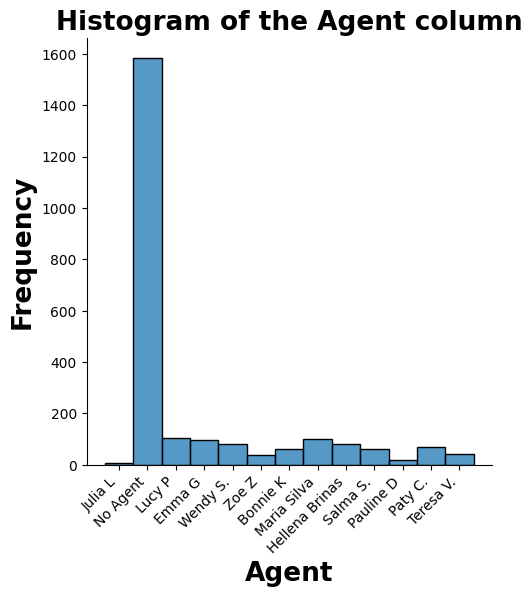

<Figure size 2000x1000 with 0 Axes>

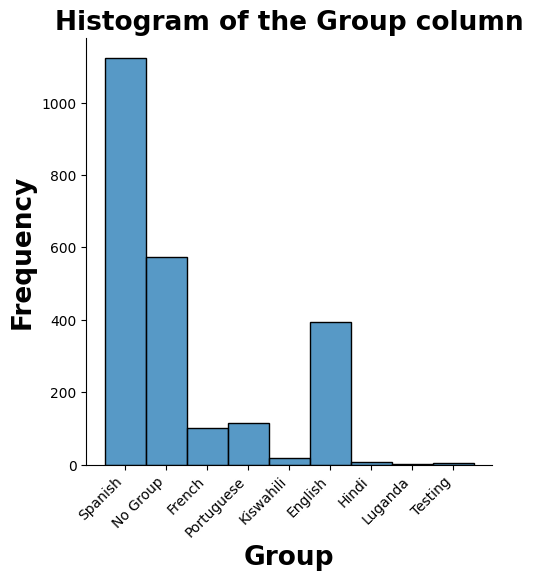

<Figure size 2000x1000 with 0 Axes>

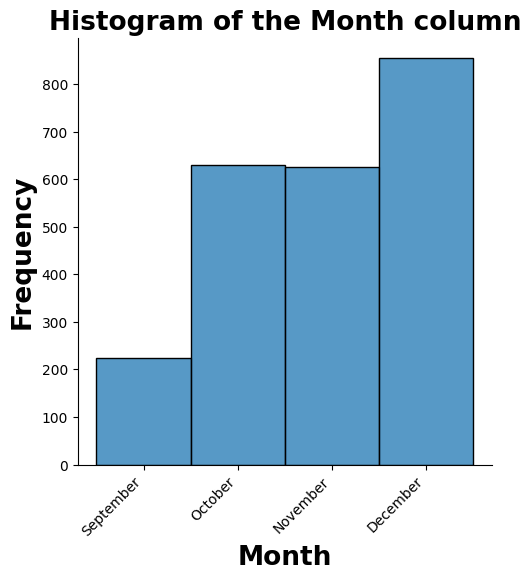

<Figure size 2000x1000 with 0 Axes>

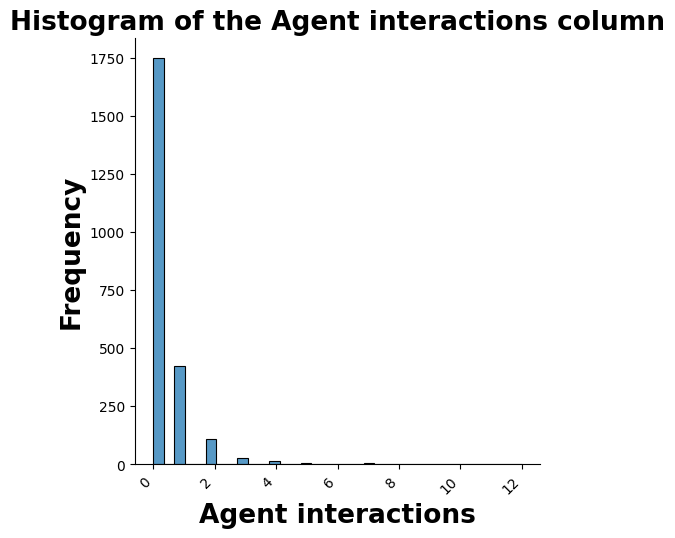

<Figure size 2000x1000 with 0 Axes>

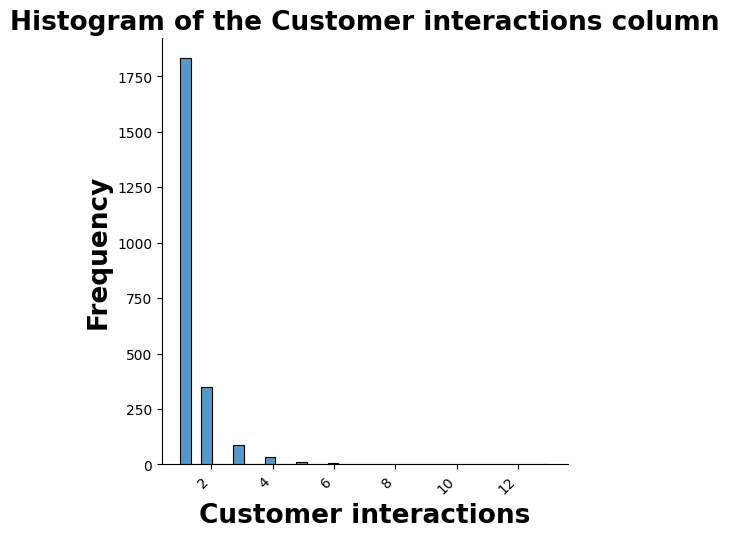

<Figure size 2000x1000 with 0 Axes>

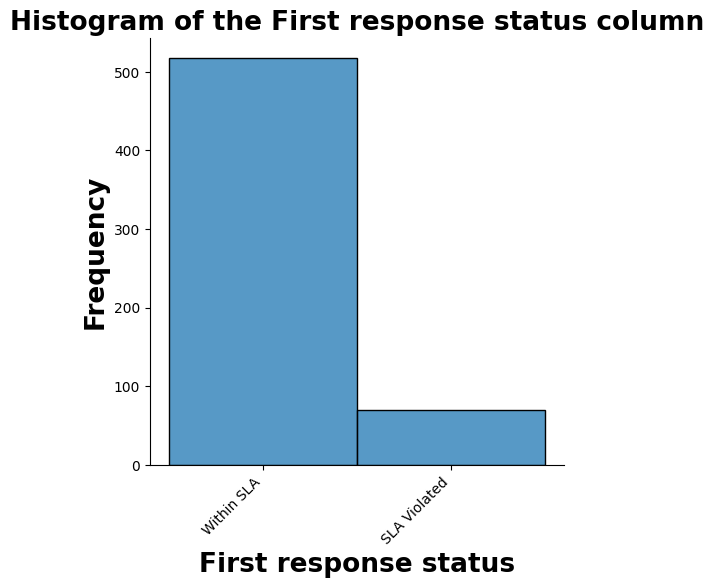

<Figure size 2000x1000 with 0 Axes>

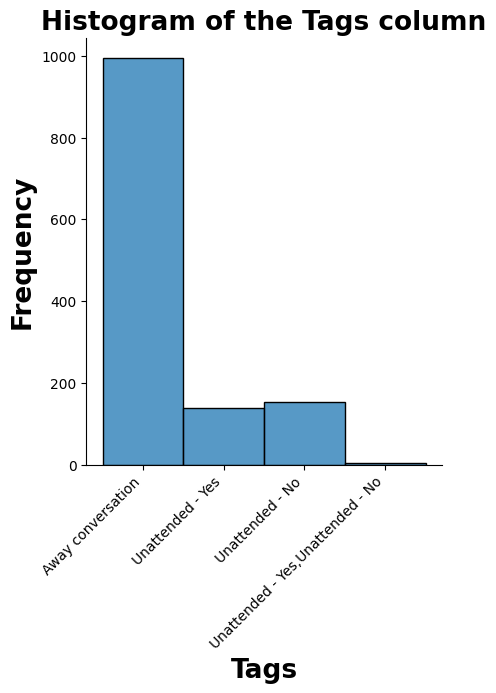

<Figure size 2000x1000 with 0 Axes>

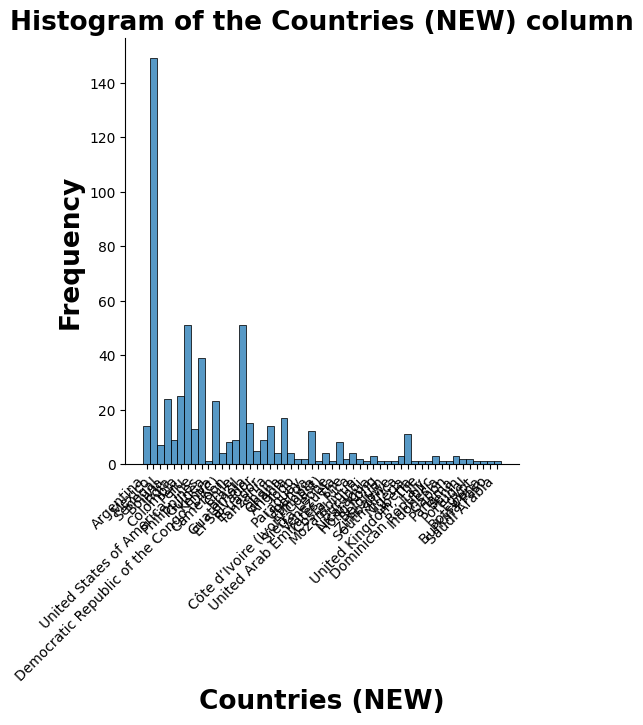

<Figure size 2000x1000 with 0 Axes>

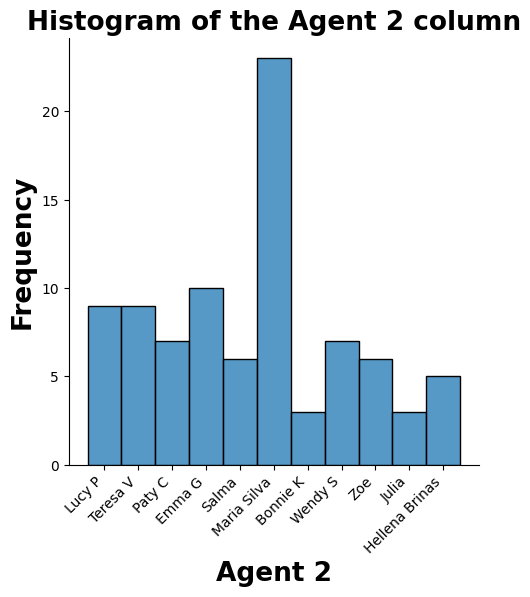

<Figure size 2000x1000 with 0 Axes>

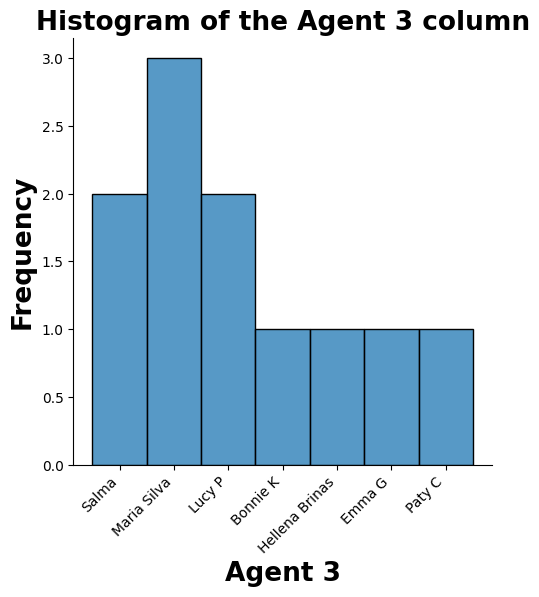

<Figure size 2000x1000 with 0 Axes>

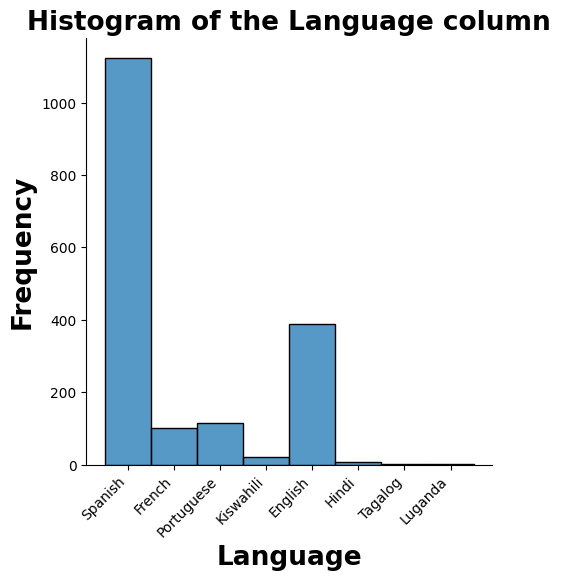

<Figure size 2000x1000 with 0 Axes>

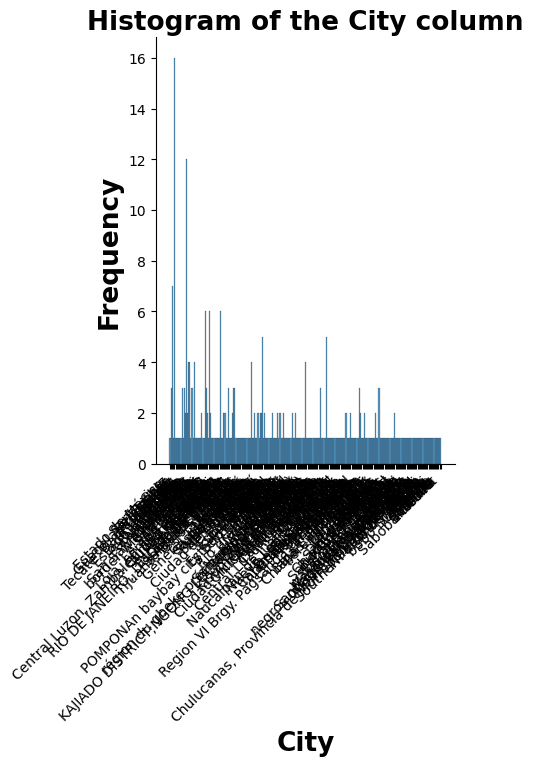

<Figure size 2000x1000 with 0 Axes>

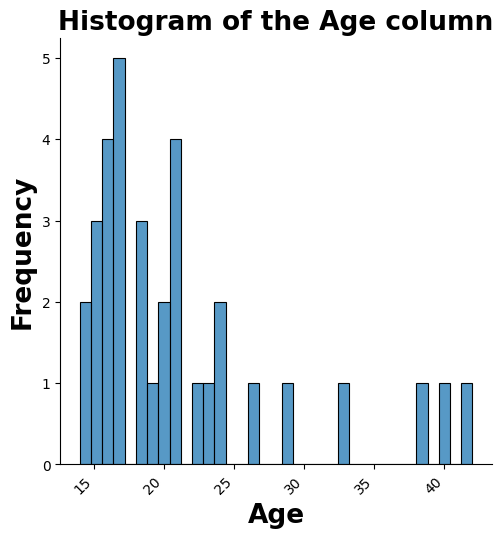

<Figure size 2000x1000 with 0 Axes>

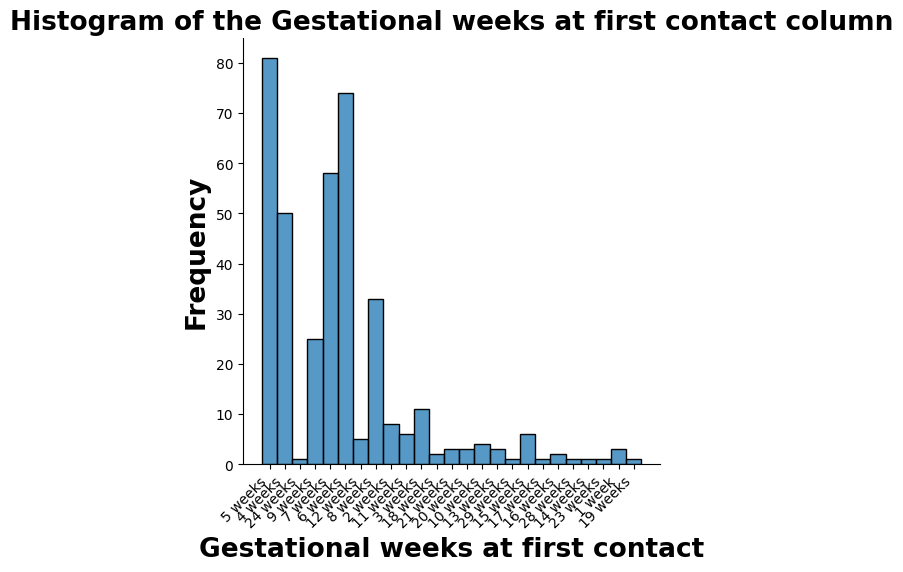

<Figure size 2000x1000 with 0 Axes>

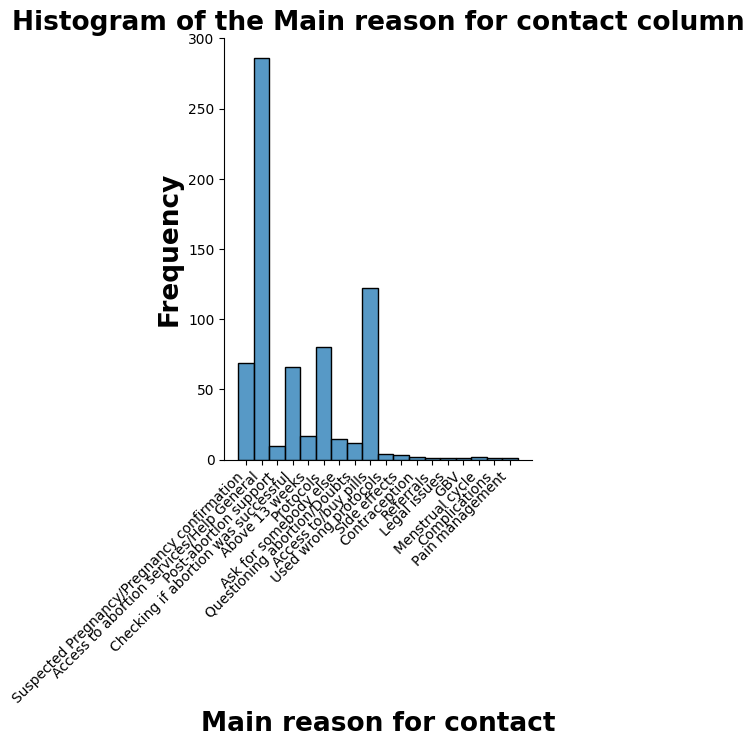

<Figure size 2000x1000 with 0 Axes>

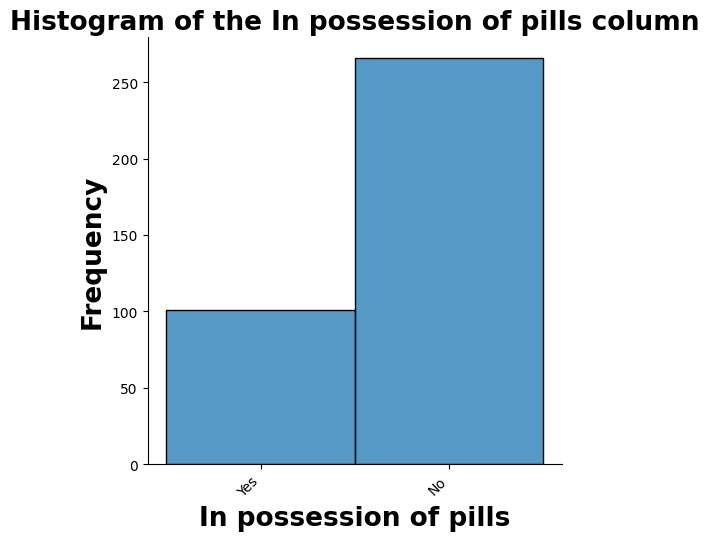

<Figure size 2000x1000 with 0 Axes>

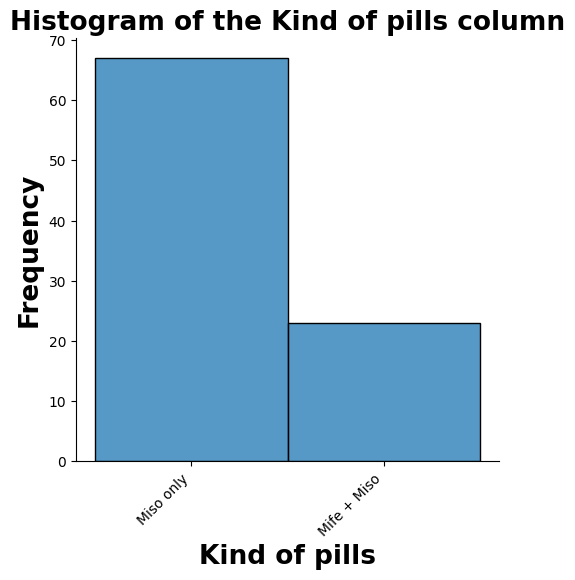

<Figure size 2000x1000 with 0 Axes>

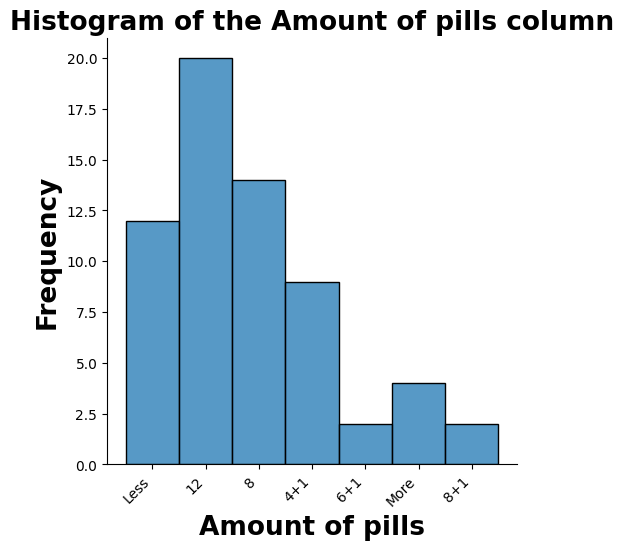

<Figure size 2000x1000 with 0 Axes>

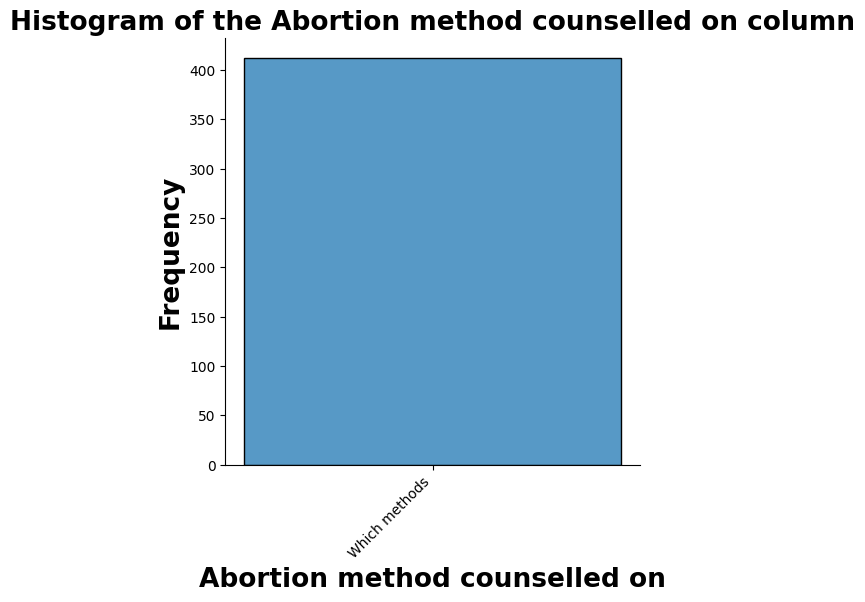

<Figure size 2000x1000 with 0 Axes>

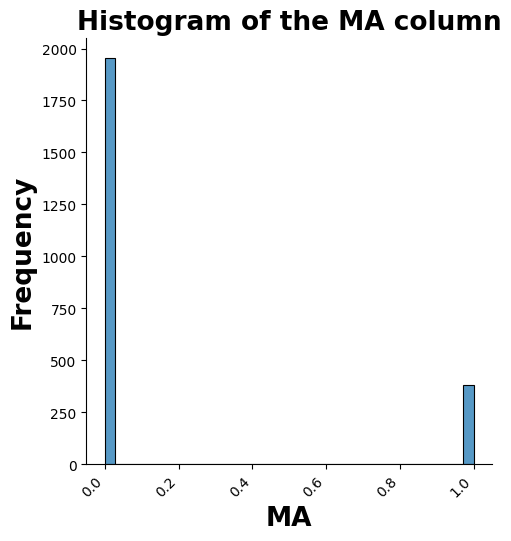

<Figure size 2000x1000 with 0 Axes>

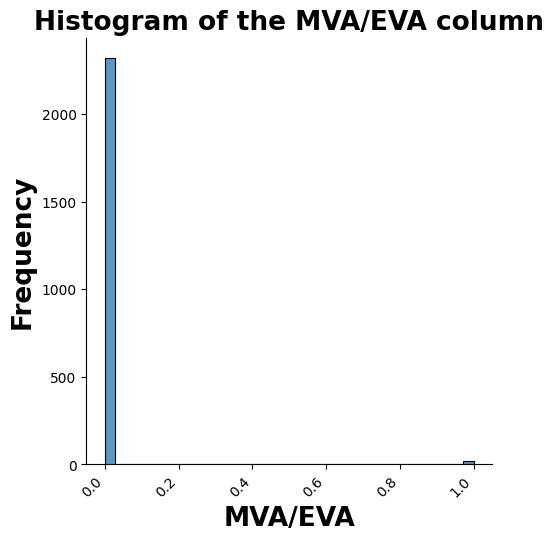

<Figure size 2000x1000 with 0 Axes>

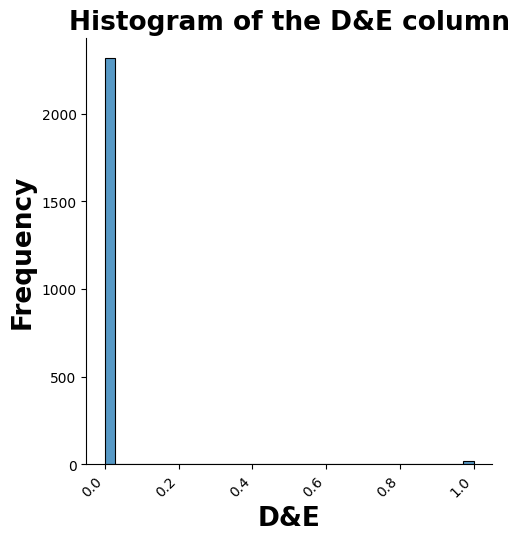

<Figure size 2000x1000 with 0 Axes>

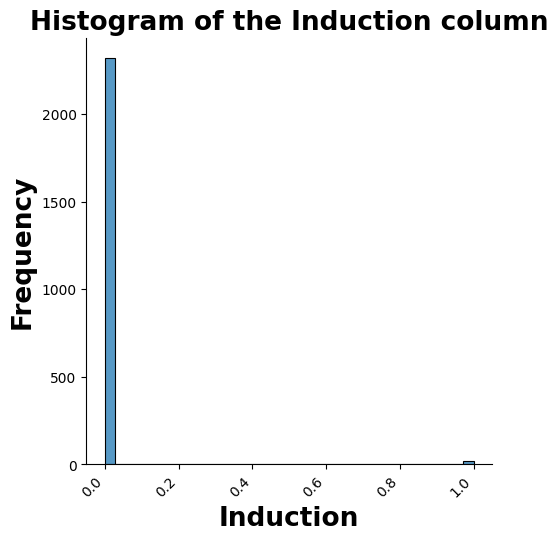

<Figure size 2000x1000 with 0 Axes>

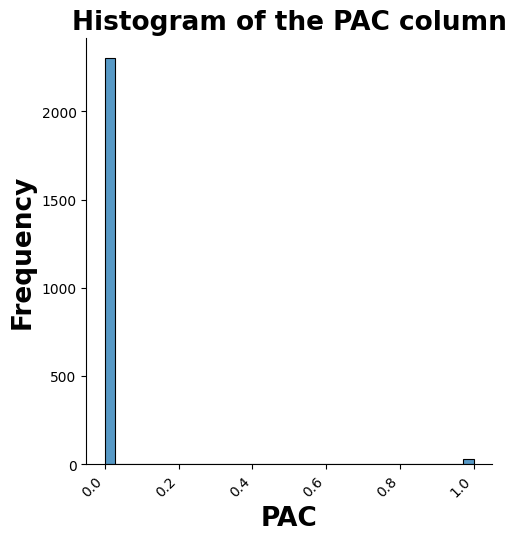

<Figure size 2000x1000 with 0 Axes>

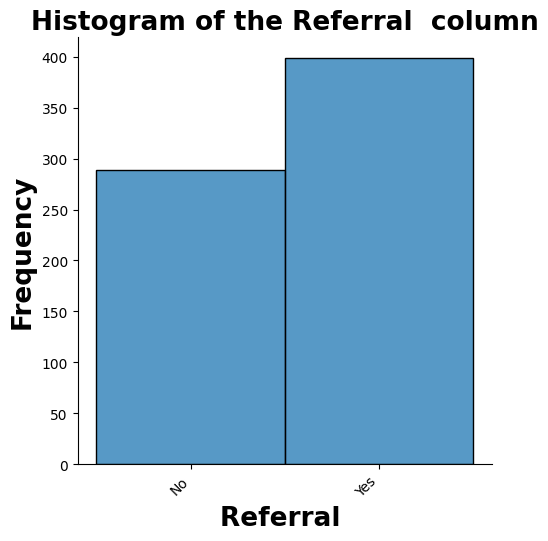

<Figure size 2000x1000 with 0 Axes>

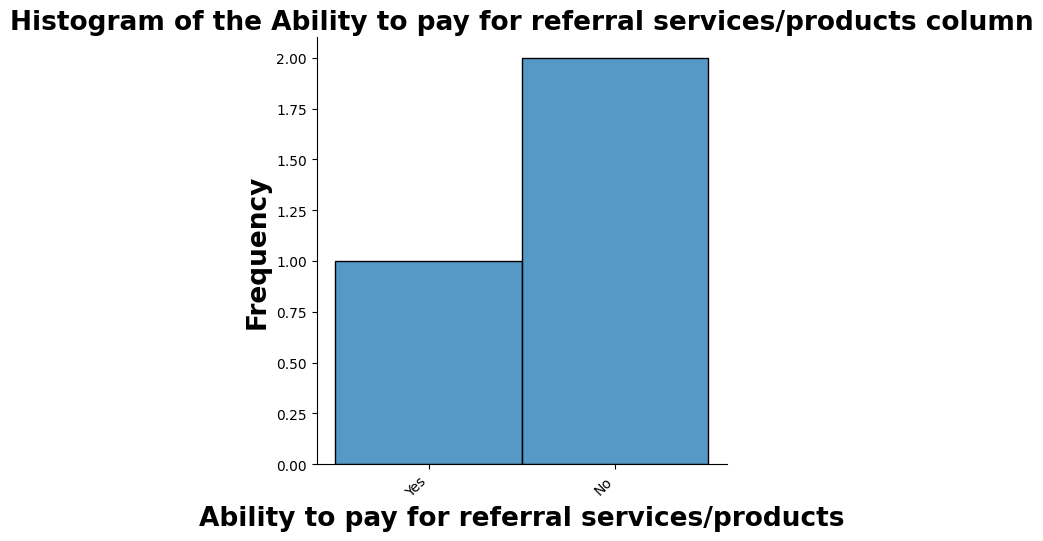

<Figure size 2000x1000 with 0 Axes>

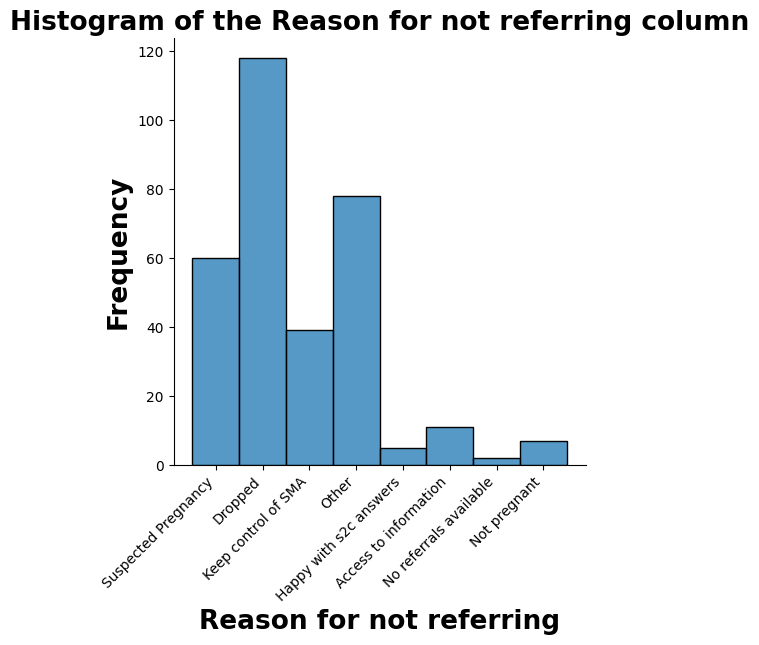

<Figure size 2000x1000 with 0 Axes>

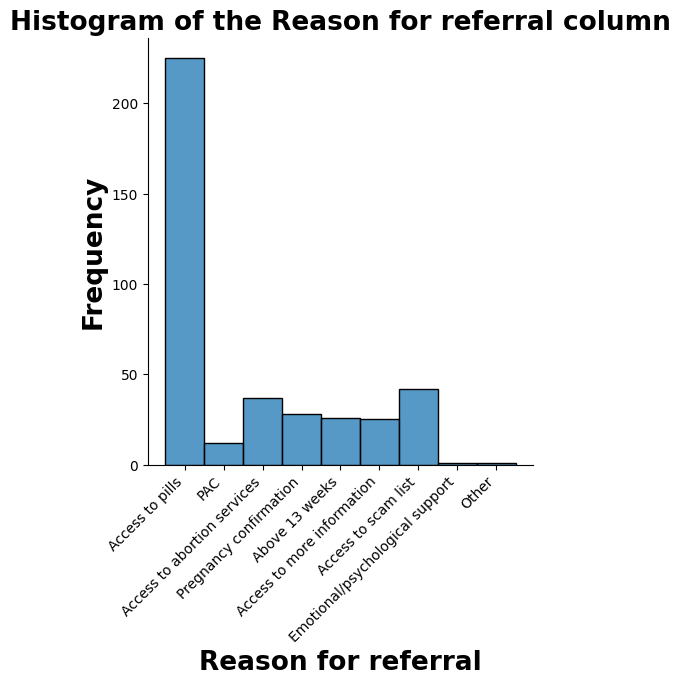

<Figure size 2000x1000 with 0 Axes>

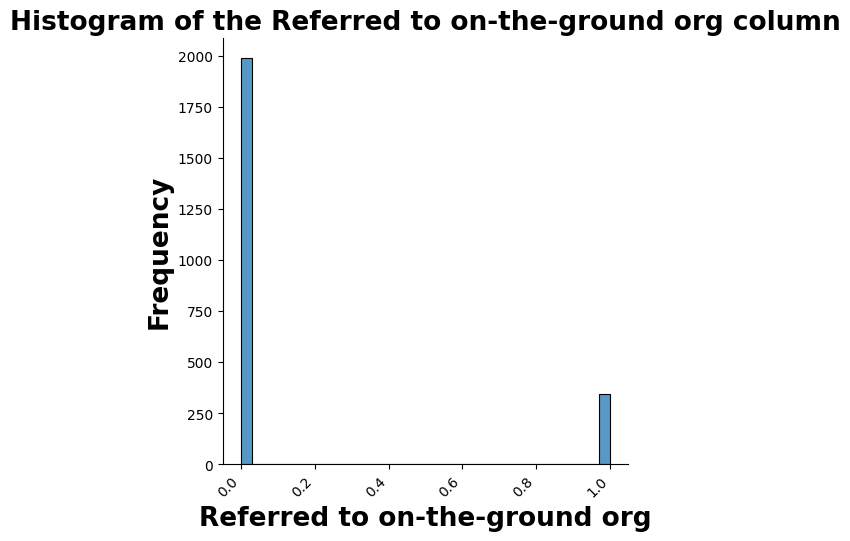

<Figure size 2000x1000 with 0 Axes>

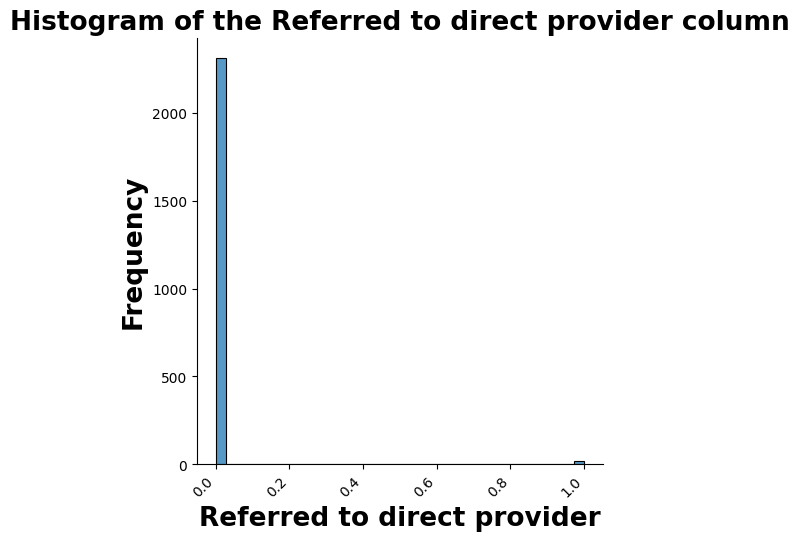

<Figure size 2000x1000 with 0 Axes>

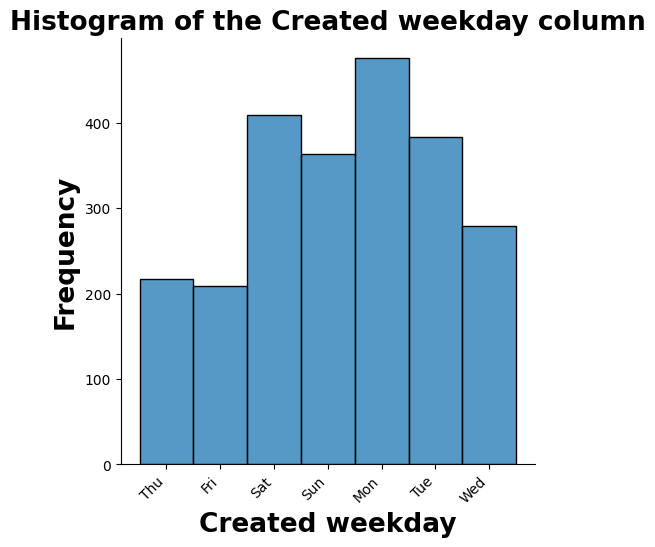

In [50]:
plot_histogram(counselling_data)

<Figure size 2000x1000 with 0 Axes>

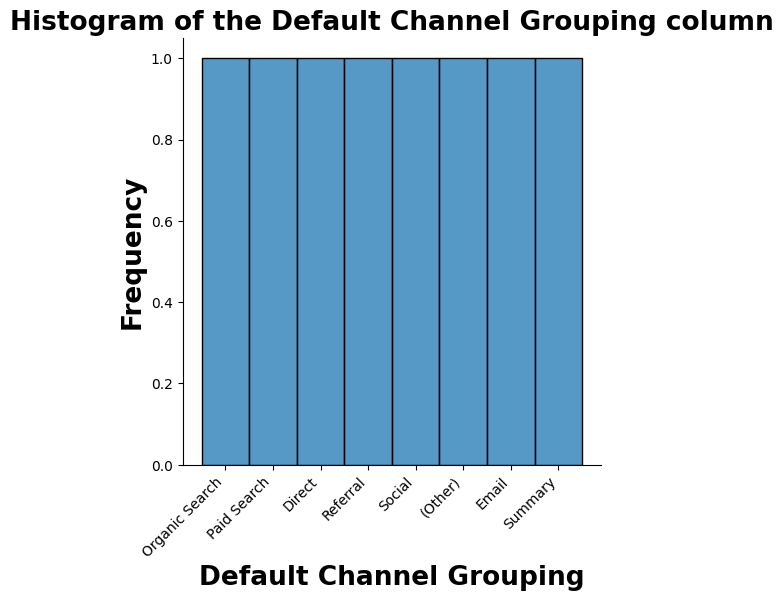

<Figure size 2000x1000 with 0 Axes>

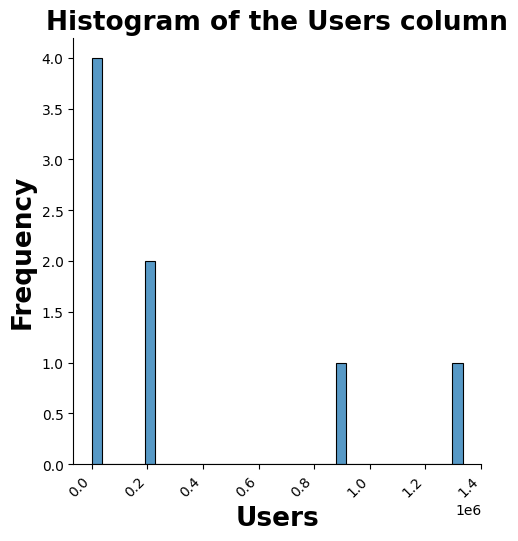

<Figure size 2000x1000 with 0 Axes>

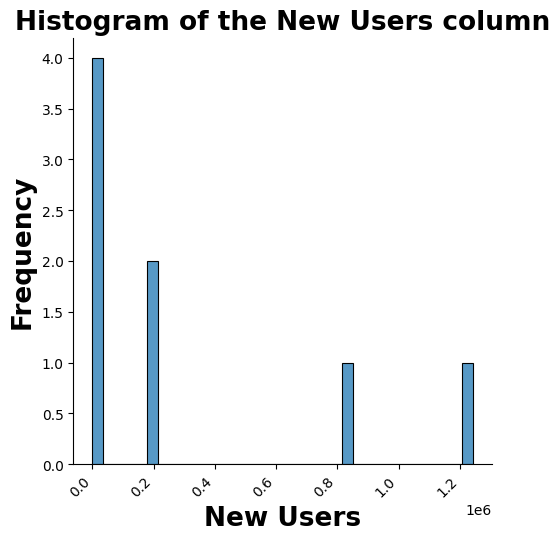

<Figure size 2000x1000 with 0 Axes>

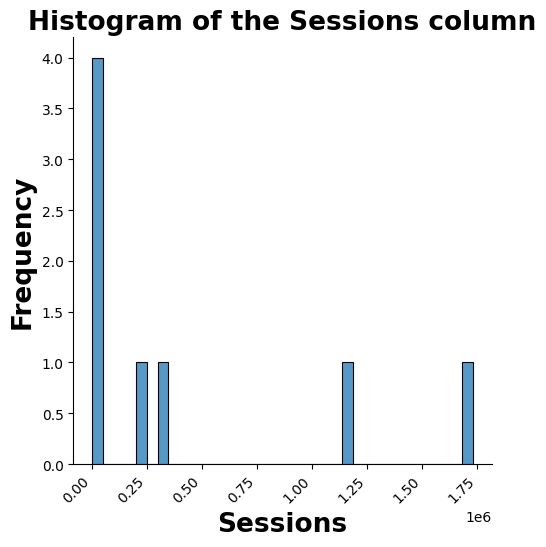

<Figure size 2000x1000 with 0 Axes>

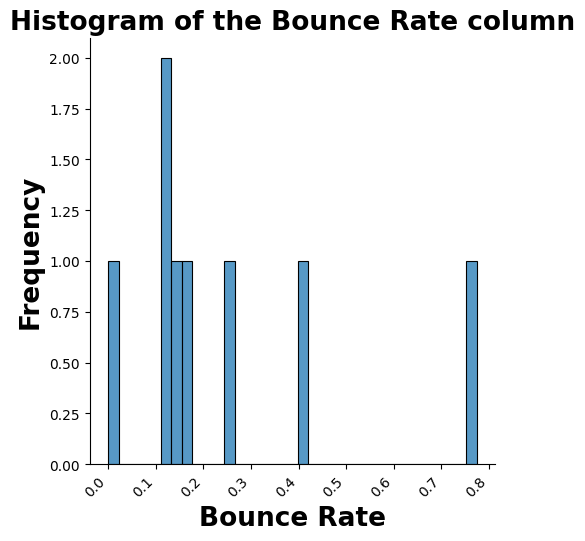

<Figure size 2000x1000 with 0 Axes>

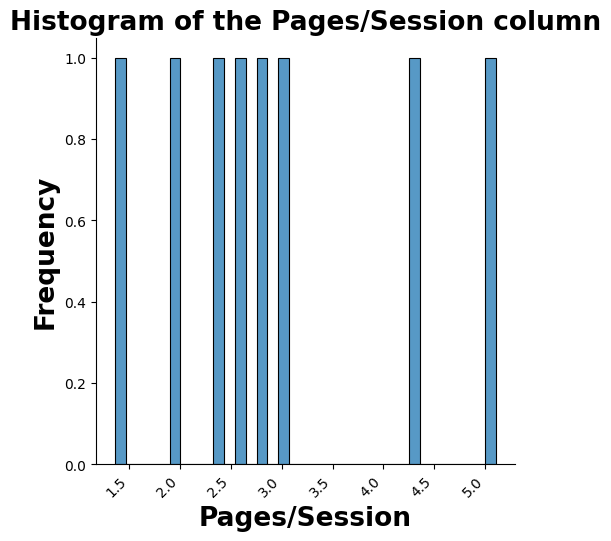

<Figure size 2000x1000 with 0 Axes>

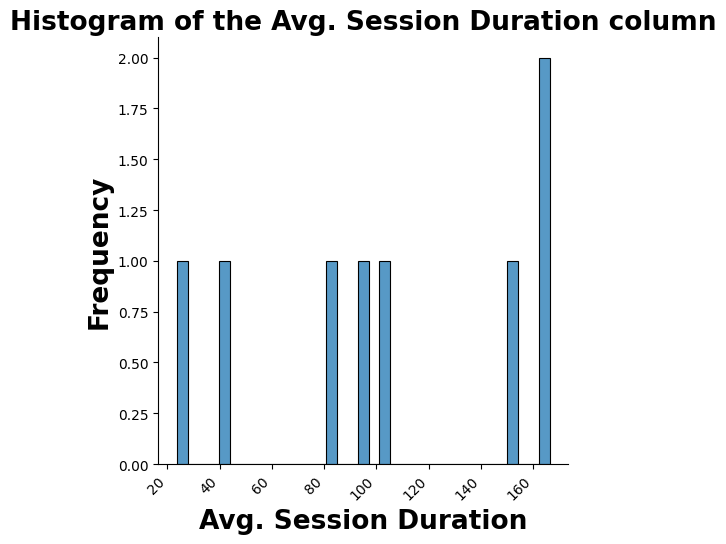

In [51]:
plot_histogram(acquisition_data)

<Figure size 2000x1000 with 0 Axes>

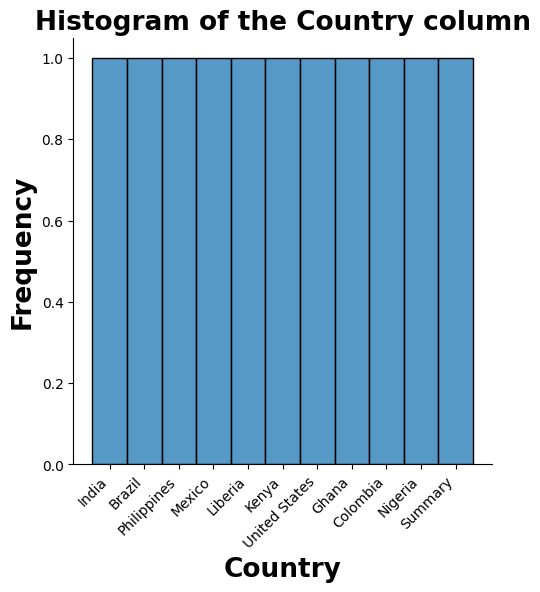

<Figure size 2000x1000 with 0 Axes>

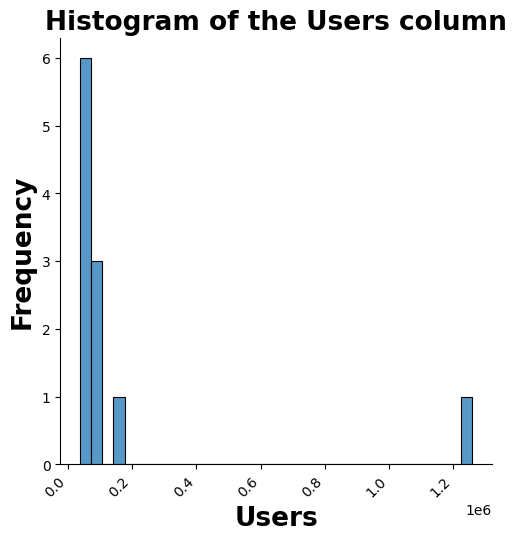

<Figure size 2000x1000 with 0 Axes>

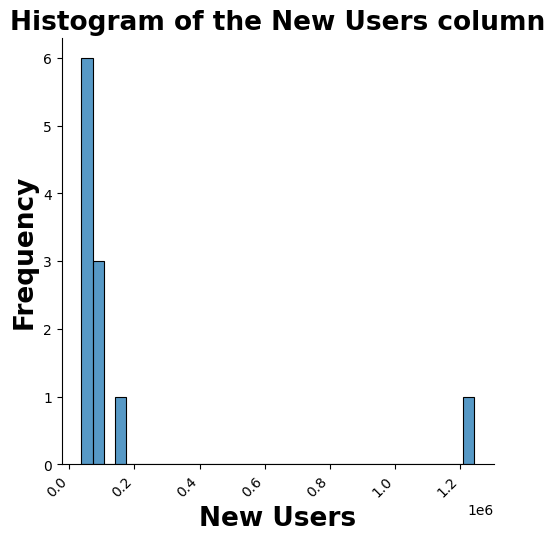

<Figure size 2000x1000 with 0 Axes>

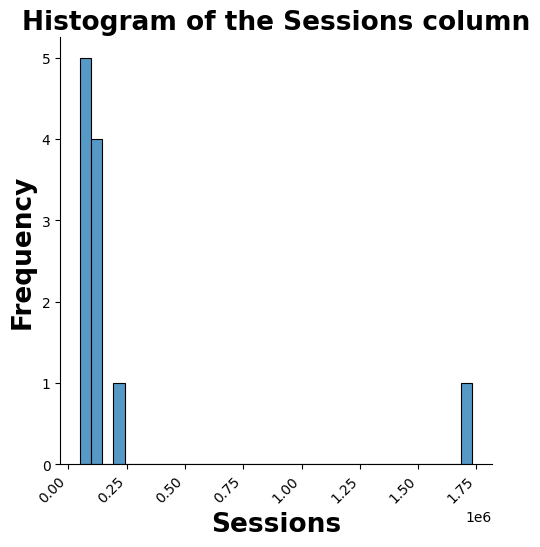

<Figure size 2000x1000 with 0 Axes>

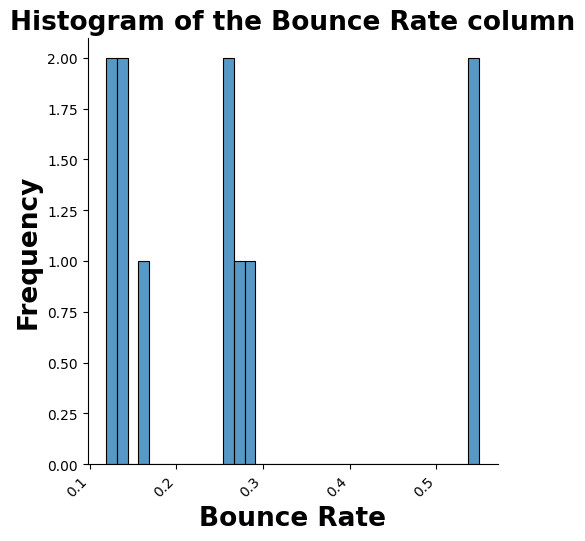

<Figure size 2000x1000 with 0 Axes>

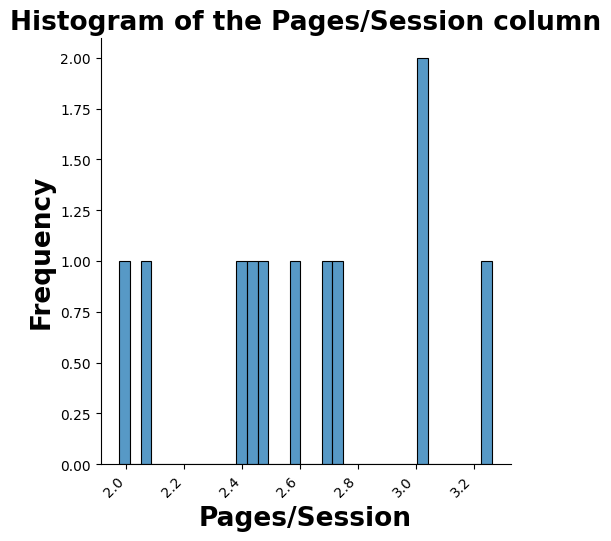

<Figure size 2000x1000 with 0 Axes>

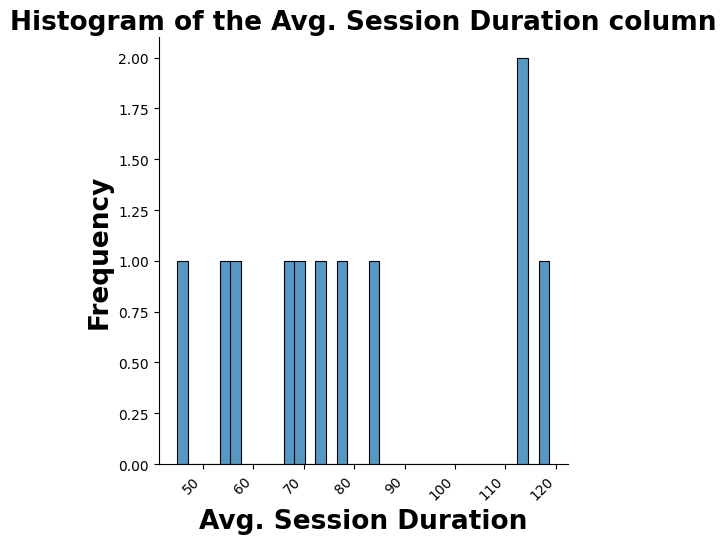

In [52]:
plot_histogram(geography_data)

Let us first analyze and visualze datasets from the google analytics data

We are going to create a bar chart to compare the number of users,number of new users,number of sessions,avg. session duration and bounce rate across different channel groupings

In [53]:
fig = px.bar(acquisition_data, x="Default Channel Grouping", y="Avg. Session Duration", color="Bounce Rate", barmode="group",
             hover_data=["Users","New Users", "Sessions","Bounce Rate"])

fig.update_layout(yaxis_title="Avg. Session Duration", title="Avg. Session Duration by Default Channel of Getting users")
fig.show()

Text(0.5, 1.0, 'Number of users by Age range')

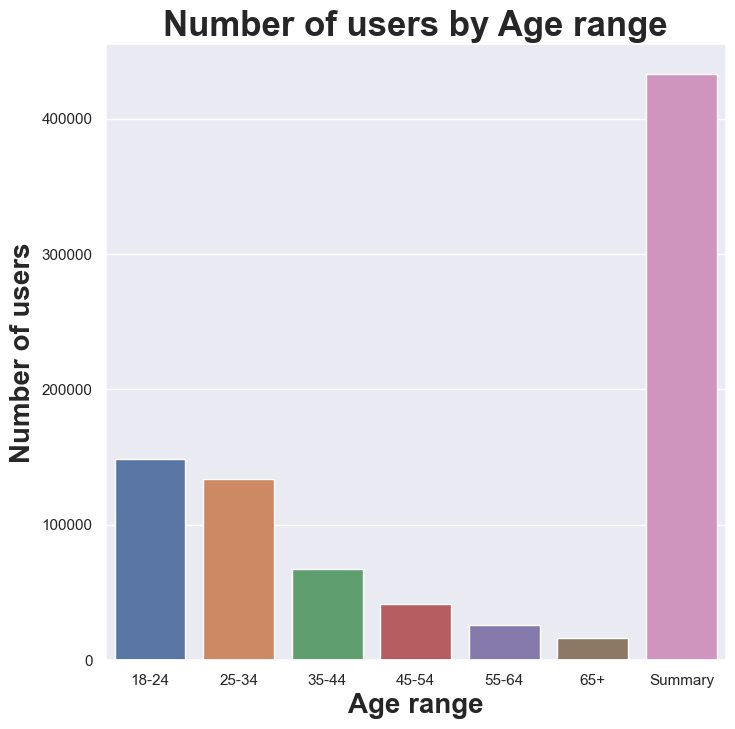

In [54]:
plt.figure(figsize=(8, 8))
sns.set()
viz = sns.barplot(x="Age", y="Users", data=age_data)
viz.set_xlabel("Age range", fontsize = 20, weight='bold')
viz.set_ylabel("Number of users", fontsize = 20, weight='bold')
viz.set_title("Number of users by Age range", fontsize = 25, weight='bold')

Text(0.5, 1.0, 'Number of users by Gender')

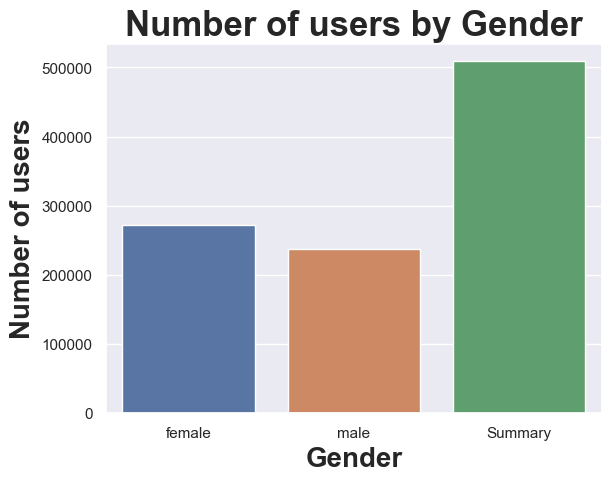

In [55]:
viz = sns.barplot(x="Gender", y="Users", data=gender_data)
viz.set_xlabel("Gender", fontsize = 20, weight='bold')
viz.set_ylabel("Number of users", fontsize = 20, weight='bold')
viz.set_title("Number of users by Gender", fontsize = 25, weight='bold')

In [56]:
fig = px.bar(page_visits, x="Page", y="Avg. Time on Page", color="Bounce Rate", barmode="group",
             hover_data=["Unique Page Views", "Page Views","Entrances","Bounce Rate", "% Exit"])

fig.update_layout(yaxis_title="Avg. Time on Page", title="Avg. Time on Page by Page")
fig.show()

In [57]:
fig = px.bar(geography_data, x="Country", y="Avg. Session Duration", color="Bounce Rate", barmode="group",
             hover_data=["Users","New Users", "Sessions","Bounce Rate"])

fig.update_layout(yaxis_title="Avg. Session Duration", title="Avg. Session Duration by Country")
fig.show()

In [58]:
users_data

,Day Index,Users
0,2022-09-01 00:00:00,8232
1,2022-09-02 00:00:00,8179
2,2022-09-03 00:00:00,7755
3,2022-09-04 00:00:00,7231
4,2022-09-05 00:00:00,8112
5,2022-09-06 00:00:00,8024
6,2022-09-07 00:00:00,7701
7,2022-09-08 00:00:00,8521
8,2022-09-09 00:00:00,8250
9,2022-09-10 00:00:00,8079


In [59]:
users_data.drop(users_data.index[-1], axis=0, inplace=True)

In [60]:
users_data["Day Index"] = pd.to_datetime(users_data["Day Index"])
users_data["Weekday"] = users_data["Day Index"].dt.strftime("%a")
users_data["Month"] = users_data["Day Index"].dt.strftime("%B")


In [61]:
users_data

,Day Index,Users,Weekday,Month
0,2022-09-01,8232,Thu,September
1,2022-09-02,8179,Fri,September
2,2022-09-03,7755,Sat,September
3,2022-09-04,7231,Sun,September
4,2022-09-05,8112,Mon,September
5,2022-09-06,8024,Tue,September
6,2022-09-07,7701,Wed,September
7,2022-09-08,8521,Thu,September
8,2022-09-09,8250,Fri,September
9,2022-09-10,8079,Sat,September


In [62]:
sorted_weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
users_data_update = users_data.sort_values(by='Weekday', ascending=False)
users_data_update['Weekday'] = pd.Categorical(users_data_update['Weekday'], categories=sorted_weekdays, ordered=True)

grouped_users_data = users_data_update.groupby(['Weekday', 'Month'], as_index=False).sum()
grouped_users_data

,Weekday,Month,Users
0,Mon,December,58310
1,Mon,November,63481
2,Mon,October,57171
3,Mon,September,38195
4,Tue,December,59068
5,Tue,November,69835
6,Tue,October,46775
7,Tue,September,40535
8,Wed,December,59134
9,Wed,November,68830


In [63]:
# grouped_users_data = users_data.groupby(["Weekday", "Month"]).sum()
fig = px.bar(grouped_users_data, x="Month", y="Users", color="Weekday", barmode="group")

fig.update_layout(yaxis_title="Number of users", title="Number of Users by Week day")
fig.show()


## Model Building

In [64]:
users_data.drop(columns=['Month',"Day Index"],inplace=True)

In [65]:
df = pd.get_dummies(users_data, columns=['Weekday'])

X_train, X_test, y_train, y_test = train_test_split(df.drop('Users', axis=1), df['Users'], test_size=0.2)


In [66]:
X_train.head()

,Weekday_Fri,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed
93,0,0,1,0,0,0,0
24,0,0,0,1,0,0,0
92,1,0,0,0,0,0,0
25,0,1,0,0,0,0,0
105,0,0,0,0,1,0,0


In [67]:
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)


let us calculate the mean squared error between the actual and predicted values

In [68]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4171032.8


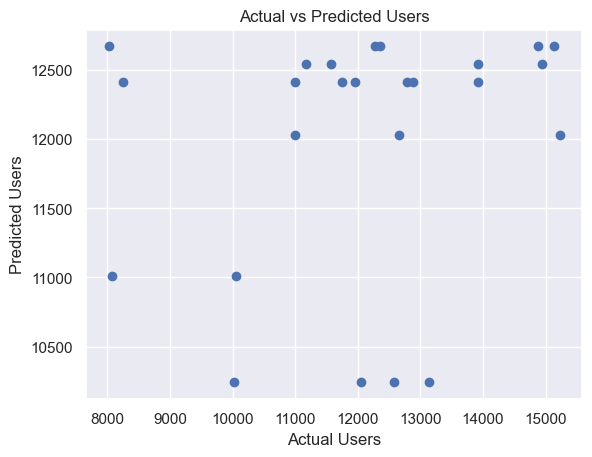

In [69]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Users")
plt.ylabel("Predicted Users")
plt.title("Actual vs Predicted Users")
plt.show()

## Conclusion
* The datasets given had missing values but they were not dealt with fully due to time constraints that was why i ignored them for visualization. The datasets were all reasonably small with the hjighest number of rows being 2336.
* from the visualization with the title `Avg. Session Duration by Default Channel of Getting users`, If we over on the graph, we can see that most new users come from organic search but the channel with the lowest bounce rate is Referral. It will be good to intensify efforts on Referral instead of the paid search as we are nost like to have higher rates of product adoption. For instance, We can have a marketing strategy around giving like 10 dollar to a user for each person the user refers to safe2choose.  
* The machine learning model didnt perform well but if there was more time, we would have been able to improve. 